# Uma breve análise sobre o naufrágio do Titanic

## 1. Introdução

O naufrágio do RMS Titanic ocorreu entre a noite de 14 de abril até à manhã de 15 de abril de 1912 no Atlântico Norte, quatro dias após o início da viagem inaugural do navio que partiu de Southampton, no Reino Unido, com destino à cidade de Nova Iorque. O maior navio de passageiros em serviço à época, o Titanic tinha estimadas 2.224 pessoas a bordo quando atingiu um iceberg por volta de 23:40 (horário no navio) no domingo, 14 de abril de 1912. O afundamento aconteceu duas horas e quarenta minutos depois, às 02:20 (05:18 GMT) na segunda-feira, 15 de abril, resultando na morte de mais de 1.500 pessoas, transformando-o em um dos desastres marítimos mais mortais. [(Fonte: Wikipedia)](https://pt.wikipedia.org/wiki/Naufr%C3%A1gio_do_RMS_Titanic)

## 2. Objetivo
Traçar um perfil das vítimas utilizando [dados do naufrágio](https://www.kaggle.com/c/titanic/data) fornecidos pela Kaggle na competição: ["Titanic: Machine Learning from Disaster".](https://www.kaggle.com/c/titanic) 

Este perfil consistirá num quantitativo das seguintes variáveis:

* Número de sobreviventes
* Sexo
* Classe socioeconômica
* Faixa etária

A partir delas, avaliaremos as relações das três últimas com a primeira para determinar:

* Qual o perfil de passageiros com maior ou menor índice de sobreviventes?
* Existe algum outro parâmetro que possa ter influenciado na sobrevivência das vítimas?



## 3. Descrição dos Dados

| **Variable** | **Definition**                             | **Key**                                        |
|--------------|--------------------------------------------|------------------------------------------------|
| survival     | Survival                                   | 0 = No, 1 = Yes                                |
| pclass       | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex          | Sex                                        |                                                |
| Age          | Age in years                               |                                                |
| sibsp        | # of siblings / spouses aboard the Titanic |                                                |
| parch        | # of parents / children aboard the Titanic |                                                |
| ticket       | Ticket number                              |                                                |
| fare         | Passenger fare                             |                                                |
| cabin        | Cabin number                               |                                                |
| embarked     | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

Para maiores informações, clique [aqui](https://www.kaggle.com/c/titanic/data).

## 4. Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## 5. Preparação dos Dados

### 5.1 Acesso

In [2]:
df=pd.read_csv('titanic-data-6.csv') # Lendo base de dados
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 5.2 Limpeza

Numa primeira inspeção, vemos que possuimos dados de 891 passageiros, entretanto as colunas 'Age' (Idade) apresentam 177 valores nulos (_missing data_); 'Cabin' (Cabine), 687 e; 'Embaked' (Local de Embarque), 2. Investigaremos cada caso para saber o que podemos fazer.

In [3]:
df.isna().sum() #Checando missing datas

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 5.2.1 Idade

O parâmentro idade, desconsiderando-se _missing datas_, segue a distribuição a seguir. 

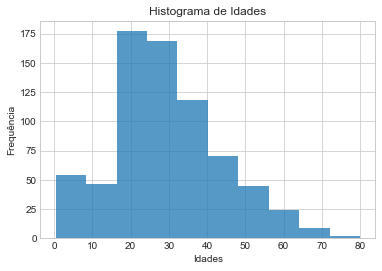

In [4]:
plt.hist(df['Age'].dropna(), alpha=.75);
plt.title('Histograma de Idades')
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.grid(True);

Se adotássemos o método convencional de simplesmente imputar o valor da média nos _missing datas_, isso alteraria consideravelmente a distribuição original. 

In [5]:
df_orig_age = df['Age'].dropna() # Copiando dados de idade da distribuição original
mean_age = df['Age'].mean()
df_mean_age = df['Age'].fillna(mean_age) # Dados para distribuição com valor de média de idades imputado. Edição 1.

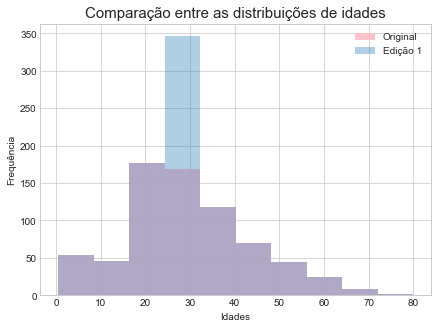

In [6]:
# Comparação entre as distribuições de idade Original e Edição 1
fig, ax = plt.subplots(figsize=(7,5))
plt.hist(df_orig_age, alpha=.95, color="pink", label="Original")
plt.hist(df_mean_age, alpha=.35, label = "Edição 1");
plt.title('Comparação entre as distribuições de idades', fontsize=15)
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True);

Investigando melhor os dados de idade, traçando distribuições agrupadas pelas classes e sexo, vemos que os passageiros mais velhos costumam ser mais ricos. Além disso, em geral as mulheres são mais novas que os homens. 
Imputaremos valores em nossa distribuição original de idades os valores das medianas das distribuições agrupadas mencionadas anteriormente. 
Desta forma, por exemplo, uma mulher da primeira classe, cujo o valor de idade não esteja disponível, será atribuído a este a mediana das idades de seu grupo, que no caso é 35 anos.

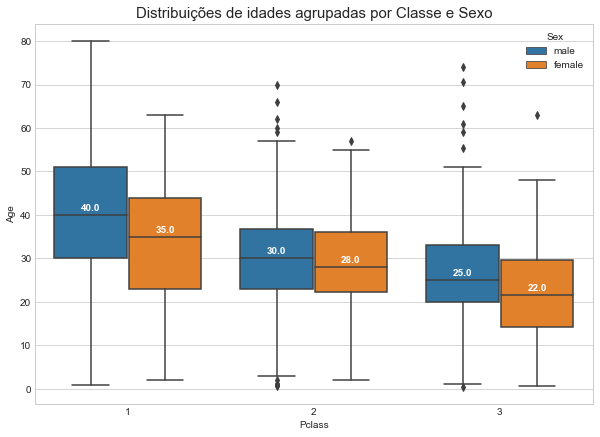

In [7]:
fig, ax = plt.subplots(figsize=(10,7))
testPlot = sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df)
m1 = df.groupby(['Pclass', 'Sex'])['Age'].median().values
mL1 = [str(np.round(s, 0)) for s in m1]

ind = 0
for tick in range(len(testPlot.get_xticklabels())):
    testPlot.text(tick-.2, m1[ind+1]+1, mL1[ind+1],  horizontalalignment='center',  color='w', weight='bold')
    testPlot.text(tick+.2, m1[ind]+1, mL1[ind], horizontalalignment='center', color='w', weight='bold')
    ind += 2    

plt.title('Distribuições de idades agrupadas por Classe e Sexo', fontsize=15)    
plt.show()

Substituiremos os _missing datas_ de idade segundo estas informações.

In [8]:
def impute_age(cols):
    """Substitui valores nulos em uma coluna (cols), de acordo com dois parâmetros condicionais (Pclasse e Sex), pelas medianas
    agrupadas destes parâmetros.
    """
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    
    if pd.isnull(Age):

        if Pclass == 1:
            if Sex == 'male':
                return 40
            else:
                return 35

        elif Pclass == 2:
            if Sex == 'male':
                return 30
            else:
                return 28

        else:
            if Sex == 'male':
                return 25
            else:
                return 22
    else:
        return Age

In [9]:
df['Age'] =df[['Age','Pclass','Sex']].apply(impute_age,axis=1)

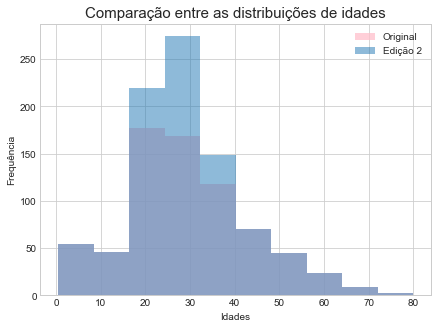

In [10]:
# Comparação entre as distribuições de idade Original e Edição 2
fig, ax = plt.subplots(figsize=(7,5))
plt.hist(df_orig_age, alpha=.75, color='pink', label='Original')
plt.hist(df['Age'], alpha=.5, label='Edição 2')
plt.title('Comparação entre as distribuições de idades', fontsize=15)
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True);

Para análise do parâmetro idade, dividiremos a amostra em __faixas etárias__, da seguinte maneira:

* __Crianças e Jovens__: 0 a 20 anos;
* __Adultos Jovens__: 20 a 40 anos;
* __Adultos__: 40 a 60 anos e;
* __Idosos__: Acima de 60 anos.



In [11]:
bin_edges = [0.00, 20.00, 40.00, 60.00, 80.00] # Definindo faixas etárias

In [12]:
bin_names = ['Crianças e Jovens','Adultos Jovens','Adultos','Idosos'] # Nomeando as faixas etárias

In [13]:
df['Age_group'] = pd.cut(df['Age'], bin_edges, labels=bin_names)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adultos Jovens
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adultos Jovens
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adultos Jovens


#### 5.2.2 Parentesco


Para efeitos de simplificação, vamos fundir as colunas "SibSp" e "Parch" para obter uma única coluna ("Family") informando se o passageiro viajava com __pelo menos um familiar (1) ou não (0)__.

In [14]:
df['Family'] = 0
df.loc[df['SibSp']+df['Parch'] > 0, 'Family'] = 1
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adultos Jovens,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adultos Jovens,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adultos Jovens,0


#### 5.2.3 Cabines

Não há maiores informações sobre as cabines, por ora, vamos apenas admitir que os valores são conhecidos (known) ou desconhecidos (unknown).

In [15]:
def k_or_u(value):
    """Avalia se o valor (value) em uma série é nulo. Caso seja, lhe será atribuído o valor "Desconhecido"('unknown'), 
       do contrário "Conhecido"('known')."""
       
    if pd.isnull(value):
        return 'unknown'
    else:
        return 'known'

In [16]:
df['Cabin'] = df['Cabin'].apply(k_or_u)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S,Adultos Jovens,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,known,C,Adultos Jovens,1


#### 5.2.4 Local de Embarque

Apenas dois passageiros não tiveram seus locais de embarque informados. São eles:

In [17]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,known,NaN,Adultos Jovens,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,known,NaN,Idosos,0


Como a maioria dos passageiros embarcou em Southampton.

In [18]:
df.groupby('Embarked')['PassengerId'].count()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

Suporemos que nossas duas passageiras também embarcaram lá.

In [19]:
df['Embarked'] = df['Embarked'].fillna('S')

Checando novamente os dados. Não possuímos mais _missing datas_.

In [20]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Age_group      0
Family         0
dtype: int64

## 6. Explorando Informações

Nesta sessão, ilustraremos as proporções percentuais de náufragos agrupadas pelas categorias discriminadas na seção 2 para ver como elas influenciaram no número de sobreviventes.

### 6.1 Proporções percentuais agrupadas por Categoria

In [21]:
# Uma expressão para cálculo de porcentagens
percent = lambda par,tot: (par/tot)*100

In [22]:
# Definindo uma função para criação de barras aninhadas
def survivors_stacked_bars(cat, x_label='', pos_subplot=0, leg=False):
    """Plota gráfico de barras aninhadas com os percentuais proporcionais dos passageiros Sobreviventes/Mortos 
       agrupados pela categoria(cat) desejada. Caso for desejado, é possível alterar o rótulo do eixo x (x_label),
       definir a posição de subplot(pos_subplot) e se a legenda será impressa(leg)."""
    # Contagem de passageiros por categoria
    totals = df.groupby(cat)['PassengerId'].count()
    # Contagem de sobreviventes por categoria
    counts = df.groupby([cat,'Survived'])['PassengerId'].count()
    # Percentual agrupado por categoria
    perc = percent(counts,totals)
    perc_dead = perc[:,0] # Percentuais de mortos por sexo
    perc_alive =  perc[:,1] # Percentuais de sobreviventes por sexo
    # Criando barras aninhadas
    cat_keys = perc_dead.keys().astype('str') # x-axis labels
    plt.subplot(3,3,pos_subplot)
    plt.bar(cat_keys, perc_alive, bottom=perc_dead, color='skyblue', edgecolor='white', width=.65, alpha=.8, label='Sobreviventes');
    plt.bar(cat_keys, perc_dead, color='pink', edgecolor='white', width=.65, alpha=.8, label='Mortos')
    plt.xlabel(x_label, fontsize=15)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(axis='x')
    if leg == True:
        plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
        
    return

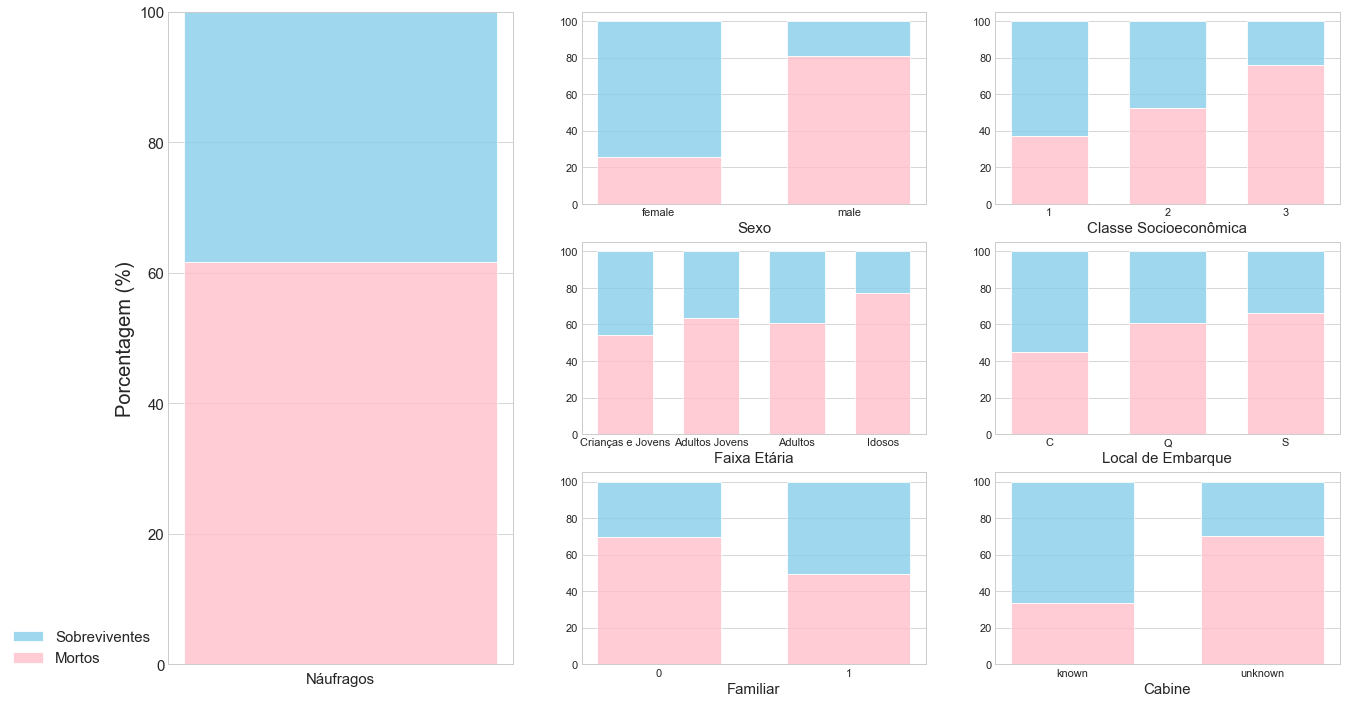

In [23]:
# Criando janelas gráficas
plt.subplots(3,3, figsize=(21,12)) 

# Subplot 1 - Náufragos
plt.subplot(1,3,1)
status = str()
counts_status = df['Survived'].value_counts()
total_status = df['Survived'].count()
perc_status = percent(counts_status,total_status)
perc_dead_status = perc_status[0]
perc_alive_status = perc_status[1]
plt.bar(status, perc_alive_status, bottom=perc_dead_status, color='skyblue', edgecolor='white', alpha=.8, width=.5, label='Sobreviventes') # Criação de barras
plt.bar(status, perc_dead_status, color='pink', edgecolor='white', alpha=.8, width=.5, label='Mortos') # Criação de barras
plt.ylabel('Porcentagem (%)', fontsize=20)
plt.xlabel('Náufragos', fontsize=15)
plt.xticks(fontsize=15);
plt.yticks(fontsize=15)
plt.ylim(0,100)
plt.grid(axis='x')
plt.legend(loc='center', bbox_to_anchor=(-.25,.025), ncol=1, fontsize=15)

# Demais subplots
survivors_stacked_bars('Sex', 'Sexo',2)
survivors_stacked_bars('Pclass', 'Classe Socioeconômica',3)
survivors_stacked_bars('Age_group', 'Faixa Etária',5)
survivors_stacked_bars('Embarked', 'Local de Embarque',6)
survivors_stacked_bars('Family', 'Familiar',8)
survivors_stacked_bars('Cabin', 'Cabine',9)

plt.show()

## 7. Formulando Conclusões

Mais de 60% dos náufragos do Titanic não sobreviveram à tragédia. Os dados sugerem que a política de ocupação dos botes salva-vidas foi a de "mulheres e crianças primeiro", mostrando que mais de 80% dos homens faleceram e que quanto mais idosos eram os náufragos maior a ocorrência de óbitos. 

A classe socioeconômica dos passageiros também mostrou-se importante, indicando que passageiros das classes mais ricas foram mais beneficiados. É possível que isto tenha explicação no fato dos mesmos terem se hospedado nos decks superiores da embarcação, em cabines, localizados próximos dos botes de segurança. Muitos passageiros viajaram em alojamentos nos decks mais inferiores, que além de estarem longe dos botes, ainda tinham o acesso aos conveses superiores bloqueados, para evitar o contato das classes mais pobres com as ricas. Este site mostra excelentes plantas do navio: (https://www.encyclopedia-titanica.org/titanic-deckplans/).

O local de embarque também parece ter influenciado na sobrevivência. Passageiros embarcados em Cherbourg apresentaram 20% menos incidência de vítimas fatais que os demais.

Estar acompando de pelo menos um familiar também conferia uma vantagem de sobreviver frente aos que não estavam.

## 8 Considerações Finais

Embora tenha sido possível extrair boas informações com esta base de dados, os parâmetros idade e cabine apresentaram muitos _missing datas_ colocando em dúvida a confiabilidade dos mesmos, principalmente este último.

Para estudos futuros seria interessante investigar mais a fundo os dados referentes às cabines conhecidas e ver como seu posicionamento nos diferentes decks impactou na sobrevivência dos náufragos. 

As variáveis "Preço do Ticket (Fare)" e "Código do Ticket (Ticket)" ficaram fora do escopo deste relatório, porém, durante o processo de _Data Wrangling_ foram encontrados alguns padrões. Como a grande discrepância de poderes aquisitivos e 210 passageiros diferentes viajando com o mesmo ticket.


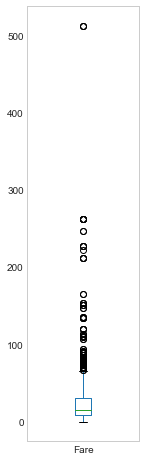

In [24]:
df['Fare'].plot(kind='box', figsize=(2,8)); # Boxplot da distribuição do valor pago por ticket
plt.grid()

In [25]:
df['Ticket'].duplicated().value_counts() # Contagem de ticket duplicados

False    681
True     210
Name: Ticket, dtype: int64

O estudo desta base de dados do naufrágio do Titanic é muito difundido na comunidade de Data Science. Existem diversas abordagens propostas por esta. Este breve relatório definitivamente não esgosta esta investigação.

## 9. Referências

### 9.1 Sites
* https://github.com/strod/Hello-World/blob/master/Titanic%20Survivors.ipynb
* https://pt.wikipedia.org/wiki/Naufr%C3%A1gio_do_RMS_Titanic
* https://seaborn.pydata.org/tutorial.html
* https://www.python.org/dev/peps/pep-0257/
* https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
* https://br.udacity.com/
* https://python-graph-gallery.com/125-small-multiples-for-line-chart/
* https://matplotlib.org/tutorials/index.html

### 9.2 Livros
* MCKINNEY, Wes. __Python for Data Analysis: Data Wrangling with Pandas, Numpy and IPython__. 2. ed. EUA: O'Reilly, 2017. 526 p.
* MILTON, Michael. __Use a Cabeça! Análise de Dados__. 1. ed. [S.l.]: Alta Books, 2010. 440 p.